<a href="https://colab.research.google.com/github/van-dang/FEniCS-Colab/blob/master/Time_stepping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1, 0.23076923076923073, 0.05325443786982245, 0.012289485662266723, 0.0028360351528307817, 0.0006544696506532574, 0.0001510314578430594, 3.4853413348398234e-05, 8.043095388091917e-06, 1.8560989357135227e-06, 4.283305236261965e-07, 9.884550545219888e-08, 2.2810501258199777e-08, 5.263961828815344e-09, 1.2147604220343009e-09, 2.8032932816176244e-10, 6.469138342194531e-11, 1.4928780789679714e-11, 3.445103259156864e-12, 7.950238290361936e-13, 1.8346703746989124e-13, 4.233854710843653e-14, 9.770433948100667e-15, 2.254715526484774e-15, 5.203189676503335e-16, 1.20073607919308e-16, 2.770929413522499e-17, 6.394452492744184e-18, 1.4756428829409548e-18, 3.4053297298637804e-19, 7.85845322276251e-20, 1.813489205252909e-20, 4.1849750890451435e-21, 9.657634820873336e-22, 2.2286849586631043e-22, 5.143119135376358e-23, 1.1868736466253276e-23, 2.7389391845199673e-24, 6.320628887353723e-25, 1.4586066663124152e-25]


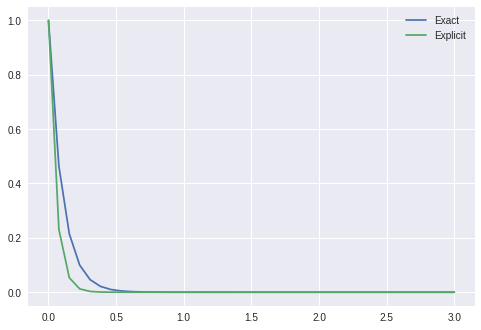

In [47]:
import numpy as np
import matplotlib.pyplot as plt


a, b  = 0, 3;
N = 40;
u = [0]*N;
t = np.linspace(a, b, num=N)

u[0] = 1;
for i in range(1,N):
  dt = t[i] - t[i-1]
  u[i] = u[i-1] + dt* (-10*u[i-1])

print(u)  

plt.plot(t,np.exp(-10*t),t,u)
plt.gca().legend(('Exact','Explicit'))


Consider an ODE 
$$\frac{du}{dt}=f(u,t)$$

*   One can only find an analytical solution for some simple problem.
*   One needs to rely on numerical methods.

For example

$$\frac{du}{dt}=-10\, u$$ 
with $u(0)=1$ can be easily solve to obtain $u(t)=\exp(-10\,t)$



[1, 0.5652173913043479, 0.3194706994328923, 0.1805703953316348, 0.10206152779614142, 0.05768695049347124, 0.032605667670222875, 0.01842929042229988, 0.010416555456082544, 0.005887618301264048, 0.0033277842572362, 0.001880921536698721, 0.0010631295642210166, 0.0006008993189075312, 0.0003396387454694739, 0.00019196972570013747, 0.00010850462756964294, 6.132870253936341e-05, 3.466404926137933e-05, 1.9592723495562212e-05, 1.1074148062709079e-05, 6.259301078922525e-06, 3.5378658272170758e-06, 1.9996632936444348e-06, 1.1302444703207677e-06, 6.388338310508689e-07, 3.610799914635347e-07, 2.0408869082721509e-07, 1.1535447742407798e-07, 6.520035680491374e-08, 3.6852375585385994e-08, 2.082960359173994e-08, 1.1773254204026913e-08, 6.6544480283630315e-09, 3.761209755161719e-09, 2.1259011659609696e-09, 1.2015963111953324e-09, 6.791631324147524e-10, 3.8387481397355533e-10, 2.1697272094157508e-10]


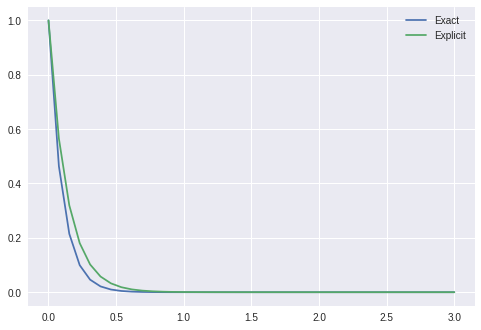

In [48]:
import numpy as np
import matplotlib.pyplot as plt


a, b  = 0, 3;
N = 40;
u = [0]*N;
t = np.linspace(a, b, num=N)

u[0] = 1;
for i in range(1,N):
  dt = t[i] - t[i-1]
  u[i] = u[i-1]/(1+10*dt)

print(u)  

plt.plot(t,np.exp(-10*t),t,u)
plt.gca().legend(('Exact','Explicit'))



[1, 0.5652173913043479, 0.3194706994328923, 0.1805703953316348, 0.10206152779614142, 0.05768695049347124, 0.032605667670222875, 0.01842929042229988, 0.010416555456082544, 0.005887618301264048, 0.0033277842572362, 0.001880921536698721, 0.0010631295642210166, 0.0006008993189075312, 0.0003396387454694739, 0.00019196972570013747, 0.00010850462756964294, 6.132870253936341e-05, 3.466404926137933e-05, 1.9592723495562212e-05, 1.1074148062709079e-05, 6.259301078922525e-06, 3.5378658272170758e-06, 1.9996632936444348e-06, 1.1302444703207677e-06, 6.388338310508689e-07, 3.610799914635347e-07, 2.0408869082721509e-07, 1.1535447742407798e-07, 6.520035680491374e-08, 3.6852375585385994e-08, 2.082960359173994e-08, 1.1773254204026913e-08, 6.6544480283630315e-09, 3.761209755161719e-09, 2.1259011659609696e-09, 1.2015963111953324e-09, 6.791631324147524e-10, 3.8387481397355533e-10, 2.1697272094157508e-10]


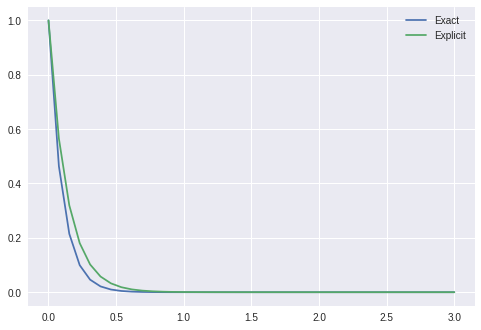

In [49]:
import numpy as np
import matplotlib.pyplot as plt


a, b  = 0, 3;
N = 40;
u = [0]*N;
t = np.linspace(a, b, num=N)

u[0] = 1;
for i in range(1,N):
  dt = t[i] - t[i-1]
  u[i] = u[i-1]/(1+10*dt)

print(u)  

plt.plot(t,np.exp(-10*t),t,u)
plt.gca().legend(('Exact','Explicit'))



[1, 0.4444444444444445, 0.19753086419753088, 0.08779149519890261, 0.03901844231062338, 0.017341529915832612, 0.007707346629258938, 0.003425487390781748, 0.0015224388403474447, 0.0006766394845988647, 0.0003007286598217174, 0.0001336571821429854, 5.9403192063549106e-05, 2.640141869491073e-05, 1.1733963864404745e-05, 5.215095050846556e-06, 2.3178200225984708e-06, 1.0301422322659878e-06, 4.578409921182171e-07, 2.0348488538587386e-07, 9.04377268381662e-08, 4.0194545261407226e-08, 1.7864242338403177e-08, 7.939663261512527e-09, 3.5287392273389033e-09, 1.568328545483958e-09, 6.970349091039818e-10, 3.097932929351024e-10, 1.3768590797115635e-10, 6.119373687606968e-11, 2.719721638936425e-11, 1.2087651728606371e-11, 5.372289657158377e-12, 2.3876842920703848e-12, 1.0611930186979522e-12, 4.716413416435333e-13, 2.0961837406379327e-13, 9.316372180613015e-14, 4.1406098580502204e-14, 1.840271048022326e-14]


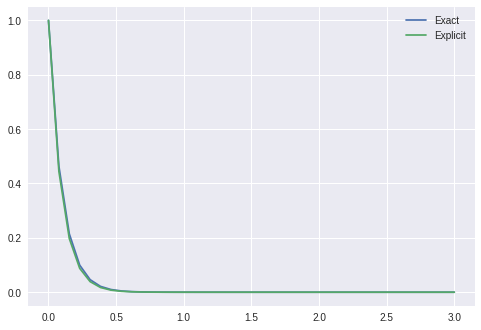

In [50]:
import numpy as np
import matplotlib.pyplot as plt


a, b  = 0, 3;
N = 40;
u = [0]*N;
t = np.linspace(a, b, num=N)

u[0] = 1;
for i in range(1,N):
  dt = t[i] - t[i-1]
  u[i] = (u[i-1]+0.5*dt*(-10*u[i-1]))/(1-0.5*dt*(-10))

print(u)  

plt.plot(t,np.exp(-10*t),t,u)
plt.gca().legend(('Exact','Explicit'))


